In [1]:
#importing respective libraries and setting up the enviornment
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns

from log_dt_class import DecisionNode, Leaf
from log_dt_helper import best_split, partition

import data_viz as dviz

In [12]:
#loading the data
data ="data/weight-height.csv"
#data = "data/circle.csv"

#data = "data/triangle.csv"
#data = "data/linear.csv"
#data = "data/024f2liris.csv"
#data = "data/3rd.csv"
df = pd.read_csv(data)

x = np.array(df[df.columns[:-1]].values.tolist(), dtype=np.float64)
y = np.array(df[df.columns[-1]].values.tolist())
data=np.c_[x,y]

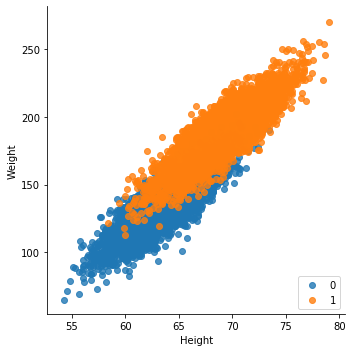

In [13]:
dviz.DDScatterDFSns(0, 1, df)

In [14]:
clf = LogisticRegression(solver='lbfgs')
depth = 4

In [15]:
def print_tree(node,indentation=""):
    '''printing function'''
    #base case means we have reached the leaf
    #if the node object is of leaf type
    if isinstance(node,Leaf):
        print(indentation+"PREDICTION"+str(node.question)+">= 0")
        return 
    #print the question at node
    print(indentation + str(node.question)+">= 0")
    
    #call the function on true branch 
    print(indentation+ "Left Branch")
    print_tree(node.true_branch,indentation + "-->")
    
    #on flase branch
    print(indentation+ "Right Branch")
    print_tree(node.false_branch,indentation + "-->")

In [16]:
def build_tree(rows, max_depth, depth):
    #takes the whole dataset as argument
    #gets the best gain and best question    
    
    model, theta, pred = best_split(rows, clf)        
    #dviz.viz_data_with_line_np(theta, rows)
    
    
    if len(rows[-1]) < 15:
        return Leaf(theta, rows)
                
    if depth >= max_depth:
        #return Leaf(rows[-1])
        return Leaf(theta, rows)
    
    pos_idx = np.where(y[rows[-1]] == 1)
    neg_idx = np.where(y[rows[-1]] == 0)
    
    if len(pos_idx[0]) < 20 and len(neg_idx[0]) < 20:        
        return Leaf(theta, rows)        
    
    #dviz.viz_data_np(rows)
    # If we reach here, we have found a useful feature / value
    # to partition on.                
    
    true_rows, false_rows = partition([x, y], pred)
    
    #print(len(true_rows[0]))    
    #print("true {}, false_rows {}".format(len(true_rows[-1]), len(false_rows[-1])))
    # Recursively build the true branch.
    tunique, tcounts = np.unique(true_rows[-1], return_counts=True)
    funique, fcounts = np.unique(false_rows[-1], return_counts=True)
    
    if len(tcounts) == 1 or len(fcounts) == 1:
        #make a leaf object and return
        return Leaf(theta, rows)
    
    """ Check minimun points here not in the above, 
        check on each split part for both classes it is less than 20 do not split further
        
    """
    if len(true_rows[-1]) > 20 and len(false_rows[-1]) > 20:
    #if tcounts[0] > 20 and tcounts[1] > 20 or fcounts[0] > 20 and fcounts[1] > 20:
        
        true_branch = build_tree(true_rows, max_depth, depth+1)            
        false_branch = build_tree(false_rows, max_depth, depth+1)
        
        return DecisionNode(theta, true_branch, false_branch, rows)

    else: 
        return Leaf(theta, rows)

In [17]:
tree=build_tree([x, y], depth, 1)

In [18]:
print_tree(tree)

[-0.47828673  0.19680042 -0.0100464 ]>= 0
Left Branch
-->PREDICTION[-0.44679782  0.184948   -0.00939702]>= 0
Right Branch
-->PREDICTION[-0.41873056  0.17040684 -0.00872949]>= 0


In [19]:
def classify(x_point, node):
    """See the 'rules of recursion' above."""
    if isinstance(node, Leaf):
        pt = np.append(x_point, 1).reshape(len(x_point) + 1, 1)
        r = node.question.dot(pt)

        if r >= 0:
            r = 1
        else:
            r = 0
        return r

    pt = np.append(x_point, 1).reshape(len(x_point) + 1, 1)
    r = node.question.dot(pt)

    if r > 0:
        return classify(x_point, node.true_branch)
    else:
        return classify(x_point, node.false_branch)

def predict(x, tree):
    yh_list = []
    if len(x.shape) == 1:
        return classify(x, tree)
    else:
        for i, value in enumerate(x):
            yh = classify(value, tree)
            yh_list.append(yh)
        return yh_list

In [20]:
y_pred = predict(x, tree)
print(classification_report(y, y_pred, labels=[0, 1]))
print(accuracy_score(y, y_pred))
print(confusion_matrix(y, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5000
           1       0.92      0.92      0.92      5000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

0.9195
[[4591  409]
 [ 396 4604]]


In [ ]:
the problem is finding best feature to separate dat
1.
    """One way is done to select all data and separate"""
2. """Now use any mechanism to select some feature and then separate data """
    a. Random selection
    b. Use clustering 
    c. Find other metrix
    
    How do you optimize values for several hyperparameters of a classification model?
    ==> Perform gridsearch on all hyperparameters.